In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [ ]:
# Load dataset and look of data heads

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df  = pd.read_csv(url, sep=';')

print("Shape:", df.shape)
display(df.head())

Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


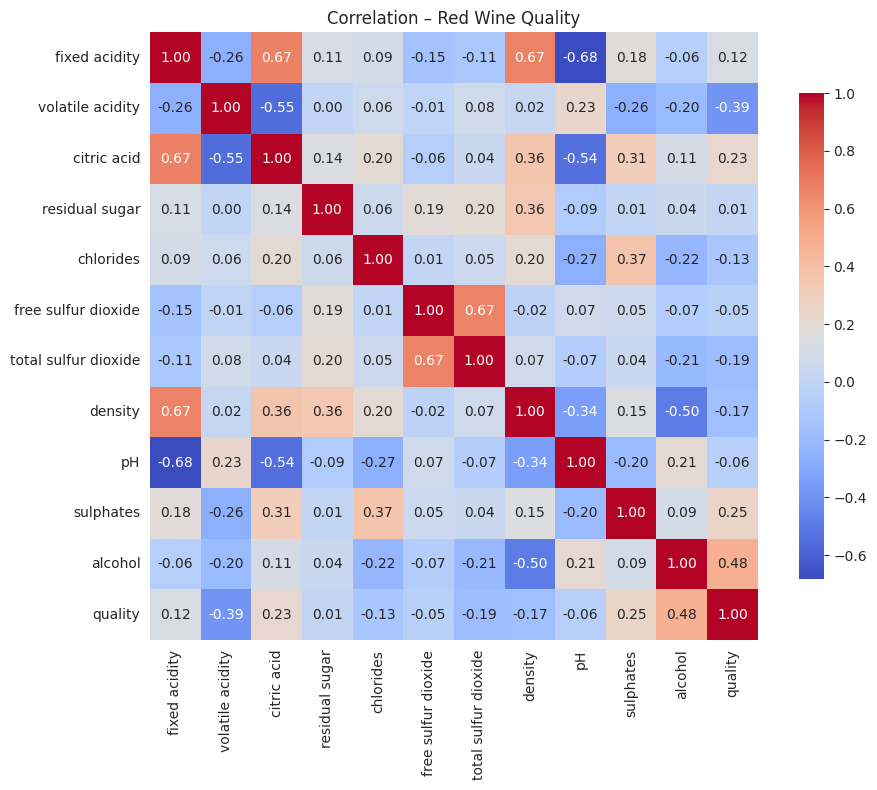

In [ ]:
# Heatmap for correlation

plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True,cbar_kws={'shrink': .8})
plt.title("Correlation – Red Wine Quality")
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop("quality", axis=1).values    # 11 features
y = df["quality"].values

In [ ]:
# 5 - Fold Validation and calculate metrics
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores   = cross_val_score(model, X, y, scoring='r2', cv=kf)
mse_scores  = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(mse_scores)

print("5-Fold")
for i, (r2, mse, rmse_) in enumerate(zip(r2_scores, mse_scores, rmse_scores), 1):
    print(f"Fold {i}:  R² = {r2:6.4f} |  MSE = {mse:7.4f} |  RMSE = {rmse_:7.4f}")

print("-------------------------------------------------------")
print(f"Average R²   : {r2_scores.mean():.4f}")
print(f"Average MSE  : {mse_scores.mean():.4f}")
print(f"Average RMSE : {rmse_scores.mean():.4f}")

5-Fold
Fold 1:  R² = 0.4032 |  MSE =  0.3900 |  RMSE =  0.6245
Fold 2:  R² = 0.2721 |  MSE =  0.4676 |  RMSE =  0.6838
Fold 3:  R² = 0.2729 |  MSE =  0.4834 |  RMSE =  0.6953
Fold 4:  R² = 0.3373 |  MSE =  0.4549 |  RMSE =  0.6745
Fold 5:  R² = 0.4267 |  MSE =  0.3479 |  RMSE =  0.5898
-------------------------------------------------------
Average R²   : 0.3424
Average MSE  : 0.4288
Average RMSE : 0.6536


In [ ]:
# Compute full-fit metrics
model.fit(X, y)
y_pred = model.predict(X)
full_mse  = mean_squared_error(y, y_pred)
full_rmse = sqrt(full_mse)
full_r2   = r2_score(y, y_pred)
print(f"Full-fit R²   : {full_r2:.4f}")
print(f"Full-fit MSE  : {full_mse:.4f}")
print(f"Full-fit RMSE : {full_rmse:.4f}")


Full-fit R²   : 0.3606
Full-fit MSE  : 0.4168
Full-fit RMSE : 0.6456


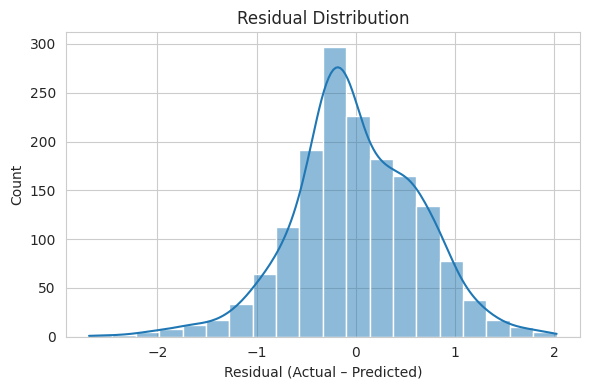

In [ ]:
# Residual plot
residuals = y - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual (Actual – Predicted)")
plt.title("Residual Distribution")
plt.tight_layout()
plt.show()

In [ ]:
# Predict new sample
new_sample = {
    "fixed_acidity"        : 7.4,
    "volatile_acidity"     : 0.70,
    "citric_acid"          : 0.00,
    "residual_sugar"       : 1.9,
    "chlorides"            : 0.076,
    "free_sulfur_dioxide"  : 11.0,
    "total_sulfur_dioxide" : 34.0,
    "density"              : 0.9978,
    "pH"                   : 3.51,
    "sulphates"            : 0.56,
    "alcohol"              : 9.4
}

X_new = np.array([[new_sample[col] for col in feature_cols]])

pred_quality = model.predict(X_new)[0] # predict

print(f"Predicted wine quality: {pred_quality:.2f} (scale 0–10)")

Predicted wine quality: 5.03 (scale 0–10)
